In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import os
import re
import sys
import copy

import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from omegaconf import OmegaConf

# Add the project root to the path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils.plotting import plot_graphs

In [17]:
from dgl.data.utils import load_graphs

In [18]:
from flowmol.analysis.molecule_builder import SampledMolecule

In [5]:
path = Path("/Users/svlg/MasterThesis/v02/aa_experiments/samples_last_try")

In [6]:
mols = Path("samples_5.bin")
mols_path = path / mols

In [7]:
graphs = load_graphs(str(mols_path))[0]
len(graphs)

30

In [8]:
full_graphs = []
for g in graphs:
    tmp_g = copy.deepcopy(g)
    tmp_g.ndata['x_1'] = tmp_g.ndata['x_t']
    tmp_g.ndata['a_1'] = tmp_g.ndata['a_t']
    tmp_g.ndata['c_1'] = tmp_g.ndata['c_t']
    tmp_g.edata['e_1'] = tmp_g.edata['e_t']
    mol = SampledMolecule(
        g = tmp_g,
        atom_type_map =["C", "H", "N", "O", "F"],
        ctmc_mol = True
    )
    full_graphs.append(mol)
len(full_graphs)

/Users/svlg/MasterThesis/v02/flowmol/analysis/molecule_builder.py:268: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/IndexingUtils.h:28.)
  bond_types = bond_types[upper_edge_mask]
/Users/svlg/MasterThesis/v02/flowmol/analysis/molecule_builder.py:269: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/IndexingUtils.h:28.)
  bond_src_idxs = bond_src_idxs[upper_edge_mask]
/Users/svlg/MasterThesis/v02/flowmol/analysis/molecule_builder.py:270: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/IndexingUtils.h:28.)
  bond_dst_idxs = bond_dst_idxs[upper_edge_mask]


30

In [9]:
# 5 19 26
idx = 19

In [10]:
import py3Dmol
from rdkit import Chem
print(idx)
try:
    pdb_block = Chem.MolToMolBlock(full_graphs[idx].rdkit_mol)
    # Visualize using py3Dmol
    viewer = py3Dmol.view(width=250, height=250)
    viewer.addModel(pdb_block, "mol")
    viewer.setStyle({"stick": {}, "sphere": {"scale": 0.3}})
    viewer.zoomTo()
    viewer.show()

except Exception as e:
    print(f"Error converting molecule to PDB block: {e}")
idx += 1


19


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [11]:
from environment.property_calculation import compute_property_stats

/opt/homebrew/Caskroom/miniforge/base/envs/deep/lib/python3.9/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [14]:
for i in [5, 19, 26]:
    print(i)
    energy = compute_property_stats(graphs[i], "energy", device="cpu")
    print(energy)
    dipole = compute_property_stats(graphs[i], "dipole", device="cpu")
    print(dipole)

5


ValueError: The integral driver seems to be have been set explicitly to 'libcint'. However, the libcint interface is not installed.

In [87]:
import torch
import numpy as np
import matplotlib.pyplot as plt

file_path = "/Users/svlg/MasterThesis/v02/data/geom/train_data_n_atoms_histogram.pt"
data = torch.load(file_path, map_location='cpu')

In [89]:
n_atoms = data[0]
count = data[1]

In [96]:
count

tensor([     1,      3,      2,      3,      7,     16,     51,     27,     88,
           209,    281,    339,    417,    627,   1113,   1516,   2164,   3156,
          5402,   7255,  11549,  15062,  21540,  26212,  36418,  46530,  57822,
         68600,  84471, 100503, 114599, 135310, 151481, 159181, 178525, 190339,
        195101, 209395, 218300, 222699, 226394, 225461, 228583, 224940, 214583,
        206414, 201949, 190934, 180248, 172512, 161315, 150188, 135989, 128784,
        115990,  99846,  91042,  79476,  70330,  56861,  52736,  42785,  33045,
         28651,  23359,  17441,  16815,  13533,  10656,   8715,   8021,   5982,
          5867,   3938,   3714,   3501,   3036,   2445,   2143,   1680,   1424,
          1277,   1393,   1186,   1192,    650,    480,    750,    709,    461,
           751,    600,    419,    570,    150,    600,    359,    180,    150,
           180,    176,    180,    300,    570,    270,    120,    240,    390,
           180,    210,     60,     60, 

In [100]:
count.sum()

tensor(5741114)

In [101]:
freq = count / count.sum()

In [120]:
more = count > 1500

In [121]:
more.sum()

tensor(65)

In [122]:
sum(count[~more])

tensor(28082)

In [123]:
sum(count[~more]) / count.sum()

tensor(0.0049)

In [124]:
true_indices = torch.nonzero(more, as_tuple=True)[0]

first_true = true_indices[0].item()
last_true = true_indices[-1].item()
print(f"First True at index: {first_true}")
print(f"Last True at index: {last_true}")

First True at index: 15
Last True at index: 79


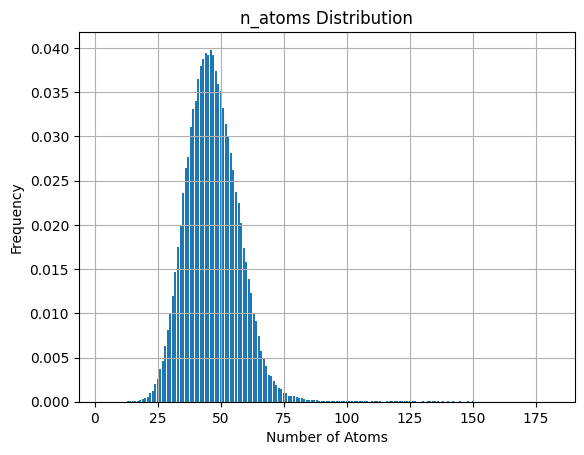

In [125]:
# Now plot
plt.figure()
plt.bar(n_atoms, count/count.sum())
plt.title("n_atoms Distribution")
plt.xlabel("Number of Atoms")
plt.ylabel("Frequency")
plt.grid(True)
# plt.savefig('/Users/svlg/MasterThesis/v02/data/geom/plots/n_atoms_distribution.png')
plt.show()

In [92]:
min(n_atoms), max(n_atoms),

(tensor(3), tensor(181))

#### Arguments

In [ ]:
args = {
    # General
    'seed': 42,
    'device': 'cpu',
    'root_dir': '/Users/svlg/MasterThesis/v02',

    # FlowMol
    'model': 'qm9_ctmc',
    'n_molecules': 5,
    'n_timesteps': 50,

    # Reward model
    'reward_model': 'PAMNet_s',
    'n_layer': 6,
    'dim': 128,
    'target': 7,
    'cutoff_l': 5.0,
    'cutoff_g': 5.0,

    # Data / Dataset
    'dataset': 'QM9',
    'data_path': '/data',
    'batch_size': 5,
}

In [ ]:
import torch
import numpy as np
import random

def set_seed(seed):
    """Seed all random generators."""
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)

set_seed(args['seed'])

#### Data

In [ ]:
import os.path as osp
from torch_geometric.loader import DataLoader
from dataset.QM9 import QM9

In [ ]:
data_root = osp.join(args['root_dir'] + args['data_path'])
train_dataset = QM9(data_root)
train_dataset.load(osp.join(data_root, 'qm9_train_data.pt'))
train_loader = DataLoader(train_dataset, batch_size=args['batch_size'], shuffle=True)
val_dataset = QM9(data_root)
val_dataset.load(osp.join(data_root, 'qm9_val_data.pt'))
val_loader = DataLoader(val_dataset, batch_size=args['batch_size'], shuffle=False)
test_dataset = QM9(data_root)
test_dataset.load(osp.join(data_root, 'qm9_test_data.pt'))
test_loader = DataLoader(test_dataset, batch_size=args['batch_size'], shuffle=False)

In [ ]:
for batch_data in train_loader:
    print(batch_data)
    break

qm9_data = batch_data.to_data_list()
qm9_dataset_smiles = [data.smiles for data in qm9_data]

In [ ]:
from rdkit import Chem
from rdkit.Geometry.rdGeometry import Point3D
bond_type_map = [Chem.rdchem.BondType.SINGLE, 
                 Chem.rdchem.BondType.DOUBLE, 
                 Chem.rdchem.BondType.TRIPLE,
                 Chem.rdchem.BondType.AROMATIC, 
                 None] # last bond type is for masked bonds

In [ ]:
def pyg_to_rdmol(positions, atom_types, bond_src_idxs, bond_dst_idxs, bond_types):
    """Builds a rdkit molecule from the given atom and bond information."""
    # create a rdkit molecule and add atoms to it
    mol = Chem.RWMol()
    for atom_type in atom_types:
        a = Chem.Atom(int(atom_type))
        mol.AddAtom(a)

    # add bonds to rdkit molecule
    visited = set()
    for bond_type, src_idx, dst_idx in zip(bond_types, bond_src_idxs, bond_dst_idxs):
        src_idx = int(src_idx)
        dst_idx = int(dst_idx)
        if (src_idx, dst_idx) in visited or (dst_idx, src_idx) in visited:
            continue
        mol.AddBond(src_idx, dst_idx, bond_type_map[bond_type])
        visited.add((src_idx, dst_idx))

    try:
        mol = mol.GetMol()
    except Chem.KekulizeException:
        return None

    # Set coordinates
    conf = Chem.Conformer(mol.GetNumAtoms())
    for i in range(mol.GetNumAtoms()):
        x, y, z = positions[i]
        x, y, z = float(x), float(y), float(z)
        conf.SetAtomPosition(i, Point3D(x,y,z))
    mol.AddConformer(conf)

    smiles = Chem.MolToSmiles(mol)
    return mol, smiles

In [ ]:
data = qm9_data[0]
mol, _= pyg_to_rdmol(data.pos, data.z.tolist(), data.edge_index[0].tolist(), data.edge_index[1].tolist(), torch.argmax(data.edge_attr, dim = 1).tolist())

In [ ]:
import py3Dmol
from rdkit import Chem

pdb_block = Chem.MolToMolBlock(mol)

# Visualize using py3Dmol
viewer = py3Dmol.view(width=250, height=250)
viewer.addModel(pdb_block, "mol")
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.3}})
viewer.zoomTo()
viewer.show()

In [ ]:
qm9_smiles = []
for data in qm9_data:
    mol, smiles = pyg_to_rdmol(data.pos, data.z.tolist(), data.edge_index[0].tolist(), data.edge_index[1].tolist(), torch.argmax(data.edge_attr, dim = 1).tolist())
    if mol is not None:
        qm9_smiles.append(smiles)

#### Sampling

In [ ]:
import flowmol

In [ ]:
model = flowmol.load_pretrained(args['model'])
model = model.to(args['device'])
model.eval()

In [ ]:
print(f"Sampling {args['n_molecules']} molecules...")
generated_molecules = model.sample_random_sizes(n_molecules=args['n_molecules'], n_timesteps=args['n_timesteps'], device=args['device'])

In [ ]:
gen_rdkit_mols = []
gen_smiles = []
for mol in generated_molecules:
    gen_rdkit_mols.append(mol.rdkit_mol)
    gen_smiles.append(mol.smiles)

In [ ]:
gen_smiles

In [ ]:
class Constrains:
    def __init__(self,
                 use_sa_score: bool = False,
                 use_aizynth_finder: bool = False,
                 use_fs_score: bool = False,
                 use_ra_score: bool = False,
                 use_posebuster: bool = False,
                 pretrained_models_path: str = "/Users/svlg/MasterThesis/v02/pretrained_models/",):

        self.use_sa_score = use_sa_score
        self.use_aizynth_finder = use_aizynth_finder
        self.use_fs_score = use_fs_score
        self.use_ra_score = use_ra_score
        self.use_posebuster = use_posebuster
        self.pretrained_models_path = pretrained_models_path

        if not (self.use_sa_score or self.use_aizynth_finder or self.use_fs_score or self.use_ra_score or self.use_posebuster):
            print("No scoring function selected. Please select at least one scoring function.")

        if self.use_sa_score:
            from molscore.scoring_functions.SA_Score import sascorer
            from rdkit import Chem
            self.sascorer = sascorer

        if self.use_aizynth_finder:
            from molscore.scoring_functions.aizynthfinder import AiZynthFinder
            self.aizynth_finder = AiZynthFinder(filter_policy=None)

        if self.use_fs_score:
            from fsscore.score import Scorer
            from fsscore.models.ranknet import LitRankNet
            fs_score_model_path = "/FSscore/pretrain_graph_GGLGGL_ep242_best_valloss.ckpt"
            model_path = self.pretrained_models_path + fs_score_model_path
            model = LitRankNet.load_from_checkpoint(model_path)
            model.to(args['device'])
            model.eval()
            self.fc_scorer = Scorer(model=model, device=args['device'])

        if self.use_ra_score:
            from molscore.scoring_functions.rascore_xgb import RAScore_XGB
            self.ra_scorer = RAScore_XGB(model = "GDB")

        if self.use_posebuster:
            from posebusters import PoseBusters
            self.posebuster = PoseBusters(config="mol")

    def get_sa_score(self, tmp_list):
        r"""Input: List of RDKit molecules"""
        rt_list = []
        for tmp in tmp_list:
            Chem.GetSSSR(tmp)
            Chem.SanitizeMol(tmp)
            score = self.sascorer.calculateScore(tmp)
            rt_list.append(score)
        return rt_list

    def get_aizynth_finder(self, tmp_list, directory='ai_finder_results', just_scores=True):
        r"""Input: List of SMILES"""
        r"""Example of aizynth_finder output:
            {'smiles': '[H]C([H])([H])[NH+](C([H])([H])[H])C([H])([H])C([H])(C#N)C([H])([H])C([H])([H])[H]',
             'AiZynth_is_solved': False,
             'AiZynth_top_score': 0.0491006895,
             'AiZynth_number_of_steps': 0,
             'AiZynth_number_of_precursors': 1,
             'AiZynth_precursors_in_stock': '',
             'AiZynth_precursors_not_in_stock': '[H]N1C2([H])C([H])([H])[NH+]3C([H])([H])C1(C([H])([H])[H])C32[H]'}"""
        tmp_list = self.aizynth_finder(tmp_list, directory)
        if just_scores:
            return [(tmp['AiZynth_is_solved'], tmp['AiZynth_top_score']) for tmp in tmp_list]
        else:
            return tmp_list

    def get_fs_score(self, tmp_list):
        r"""Input: List of SMILES"""
        return self.fc_scorer(tmp_list)
    
    def get_ra_score(self, tmp_list):
        r"""Input: List of SMILES"""
        tmp_list = self.ra_scorer(tmp_list)
        return [tmp['RAScore_pred_proba'] for tmp in tmp_list]
    
    def get_posebuster(self, tmp_list, full_report=False):
        r"""Input: List of RDKit molecules"""
        return self.posebuster.bust(tmp_list, None, None, full_report=full_report)
    
    def __call__(self, tmp_list):
        r"""Input: List of Molecules"""
        scores = dict()
        if self.use_sa_score:
            scores['sa_score'] = self.get_sa_score(tmp_list)
        if self.use_aizynth_finder:
            scores['aizynth_finder'] = self.get_aizynth_finder(tmp_list)
        if self.use_fs_score:
            scores['fs_score'] = self.get_fs_score(tmp_list)
        if self.use_ra_score:
            scores['ra_score'] = self.get_ra_score(tmp_list)
        if self.use_posebuster:
            scores['posebuster'] = self.get_posebuster(tmp_list)
        return scores

#### SA Score

In [ ]:
from molscore.scoring_functions.SA_Score import sascorer
from rdkit import Chem

In [ ]:
sa_scores = []
for tmp in gen_rdkit_mols:
    Chem.GetSSSR(tmp)
    Chem.SanitizeMol(tmp)
    score = sascorer.calculateScore(tmp)
    sa_scores.append(score)
sa_scores

In [ ]:
def get_sa_score(mol):
    Chem.GetSSSR(mol)
    Chem.SanitizeMol(mol)
    score = sascorer.calculateScore(mol)
    return score

#### AiZynthFinder

In [ ]:
from molscore.scoring_functions.aizynthfinder import AiZynthFinder

In [ ]:
aizynthfinder = AiZynthFinder(filter_policy=None)

In [ ]:
results = aizynthfinder(gen_smiles, directory='ai_finder_results')

In [ ]:
def get_aizynthfinder_score(smiles):
    results = aizynthfinder(smiles, directory='ai_finder_results')
    return results[0]['score']

In [ ]:
results = [(tmp['AiZynth_is_solved'], tmp['AiZynth_top_score']) for tmp in results]

In [ ]:
import json
import pandas as pd

In [ ]:
# Open and read the JSON file
with open('/Users/svlg/MasterThesis/v02/ai_finder_results/aizynth_out.json', 'r') as file:
    f = json.load(file)

In [ ]:
# Extract schema and data
schema = f["schema"]
data = f["data"]

# Create a DataFrame
df_aizynthfinder = pd.DataFrame(data)

In [ ]:
schema

In [ ]:
df_aizynthfinder['is_solved']

In [ ]:
type_mapping = {
    "integer": "int64",
    "number": "float64",
    "string": "object",
    "boolean": "bool"
}

In [ ]:
for field in schema["fields"]:
    column_name = field["name"]
    column_type = field["type"]
    if column_type in type_mapping:
        df_aizynthfinder[column_name] = df_aizynthfinder[column_name].astype(type_mapping[column_type])

df_aizynthfinder.set_index(schema["primaryKey"], inplace=True)

In [ ]:
df_aizynthfinder

In [ ]:
df_aizynthfinder.columns

In [ ]:
df_aizynthfinder.iloc[1]

#### FS-Score

In [ ]:
from fsscore.score import Scorer
from fsscore.models.ranknet import LitRankNet

In [ ]:
PRETRAIN_MODEL_PATH = "/Users/svlg/MasterThesis/v02/pretrained_models/FSscore/pretrain_graph_GGLGGL_ep242_best_valloss.ckpt"
model = LitRankNet.load_from_checkpoint(PRETRAIN_MODEL_PATH)
model.to(args['device'])
model.eval()
scorer = Scorer(model=model, device=args['device'])

In [ ]:
scores = scorer.score(gen_smiles)

In [ ]:
scores

In [ ]:
def get_fs_score(mol):
    return scorer.score(mol)

#### RA-Score

In [ ]:
from molscore.scoring_functions.rascore_xgb import RAScore_XGB

In [ ]:
ra_scorer = RAScore_XGB(model = "GDB")

In [ ]:
score = ra_scorer(gen_smiles)
score

In [ ]:
def get_fs_score(mol):
    assert type(mol) == list
    tmp = ra_scorer(mol)
    score = [x['RAScore_pred_proba'] for x in tmp]
    return score

#### PoseBuster

In [ ]:
from posebusters import PoseBusters

In [ ]:
buster = PoseBusters(config="mol")
df = buster.bust(gen_rdkit_mols, None, None, full_report=False)
print(df.shape)
df

In [ ]:
df.columns

In [ ]:
df.iloc[0]

#### XTB Simulation

In [ ]:
from true_reward import xtb_simulation

In [ ]:
#  Calculate the true reward
true_rewards = []
for mol in generated_molecules:
    quantity_value = xtb_simulation.compute_true_reward(mol.g, "dgl", "homolumo")
    homolumo_gap, lumo, homo = quantity_value
    print(f"HOMO-LUMO gap: {homolumo_gap:.6f} eV")
    print(f"LUMO: {lumo} eV\nHOMO: {homo} eV")

#### Differentiable Reward

In [ ]:
from PAMNet.models import PAMNet_s, Config

In [ ]:
config = Config(dataset=args['dataset'], dim=args['dim'], n_layer=args['n_layer'], cutoff_l=args['cutoff_l'], cutoff_g=args['cutoff_g'])
reward_model = PAMNet_s(config).to(args['device'])
reward_model.eval()

In [ ]:
targets = []
for data in generated_molecules:
    data = data.pyg_mol
    data.pos.requires_grad_()
    tmp = reward_model(data)
    targets.append(tmp)
    tmp.backward()
    pos_grad = data.pos.grad
print(len(targets))
print(data.pos.shape)
print(pos_grad.shape)

#### Visualize the Molecules

In [ ]:
import py3Dmol

In [ ]:
# Convert RDKit Mol to PDB block
pdb_blocks = []
for mol in gen_rdkit_molecules:
    pdb_blocks.append(Chem.MolToMolBlock(mol))

# Visualize using py3Dmol
viewer = py3Dmol.view(width=600, height=600, viewergrid=(3, 3))
viewer.addModel(pdb_blocks[0], "mol", viewer=(0, 0))
viewer.addModel(pdb_blocks[1], "mol", viewer=(0, 1))
viewer.addModel(pdb_blocks[2], "mol", viewer=(0, 2))
viewer.addModel(pdb_blocks[3], "mol", viewer=(1, 0))
viewer.addModel(pdb_blocks[4], "mol", viewer=(1, 1))
viewer.addModel(pdb_blocks[5], "mol", viewer=(1, 2))
viewer.addModel(pdb_blocks[6], "mol", viewer=(2, 0))
viewer.addModel(pdb_blocks[7], "mol", viewer=(2, 1))
viewer.addModel(pdb_blocks[8], "mol", viewer=(2, 2))
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.3}})
viewer.zoomTo()
viewer.show()